# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

# Loading Dataset

In [2]:
BASE_DIR = '/content/drive/MyDrive/UTKFace_new'

In [3]:
# labels - age, gender, IMAGES
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23718 [00:00<?, ?it/s]

In [4]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()


,image,age,gender
0,/content/drive/MyDrive/UTKFace_new/84_0_0_2017...,84,0
1,/content/drive/MyDrive/UTKFace_new/76_0_2_2017...,76,0
2,/content/drive/MyDrive/UTKFace_new/90_0_1_2017...,90,0
3,/content/drive/MyDrive/UTKFace_new/89_1_0_2017...,89,1
4,/content/drive/MyDrive/UTKFace_new/8_1_0_20170...,8,1


In [5]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

# EDA
Exploratory Data Analysis

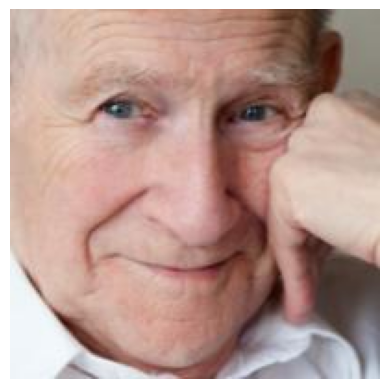

In [6]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

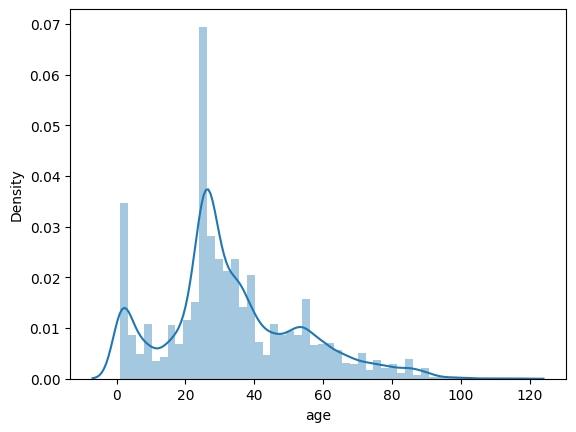

In [7]:
sns.distplot(df['age'])


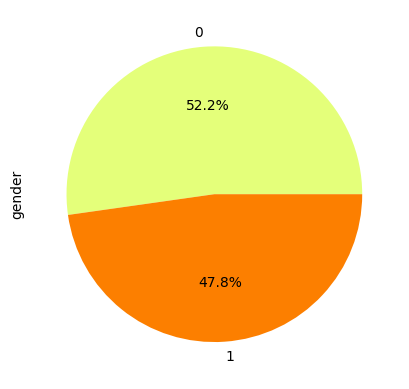

In [8]:
df['gender'].value_counts().plot(kind='pie',autopct="%.1f%%", colormap='Wistia');

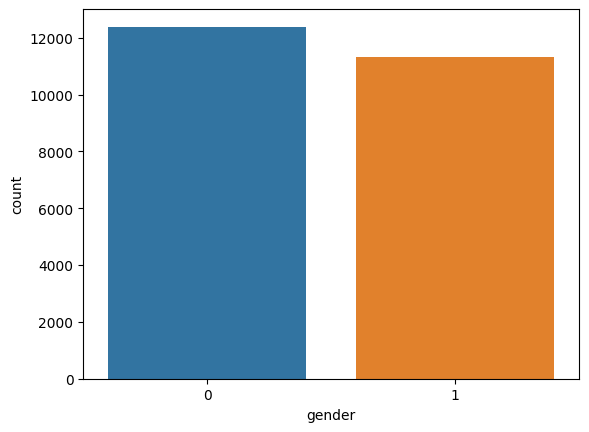

In [9]:
sns.countplot(data=df, x='gender');

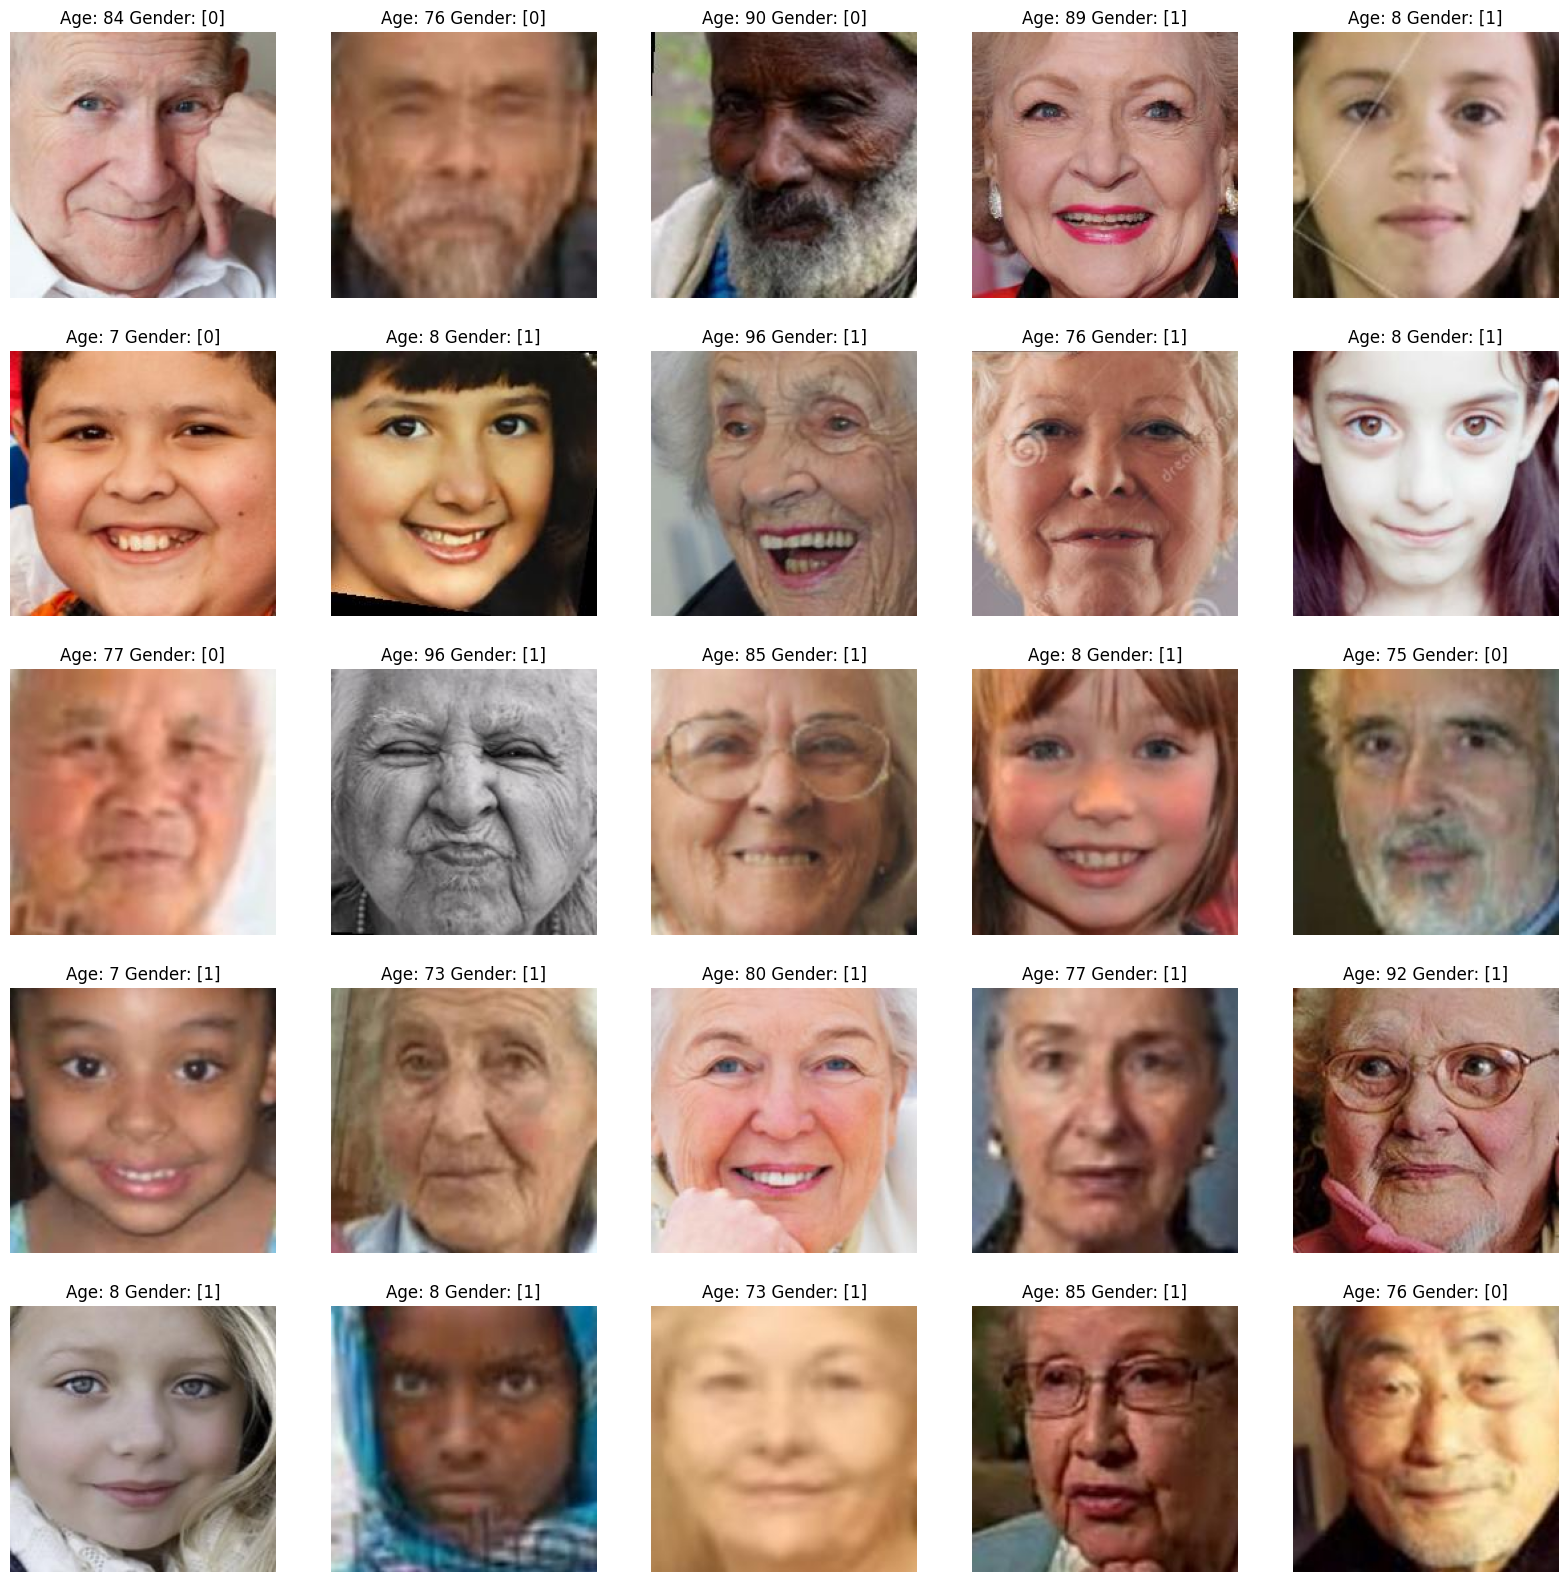

In [10]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {[gender]}")
    plt.axis('off')

# Feature Extraction


In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    #ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [12]:
X = extract_features(df['image'])

  0%|          | 0/23718 [00:00<?, ?it/s]

In [13]:
X.shape

(23718, 128, 128, 1)

In [14]:
# normalize the images
X = X/255.0

In [15]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [16]:
input_shape = (128, 128, 1)

#  Model Creation

In [17]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

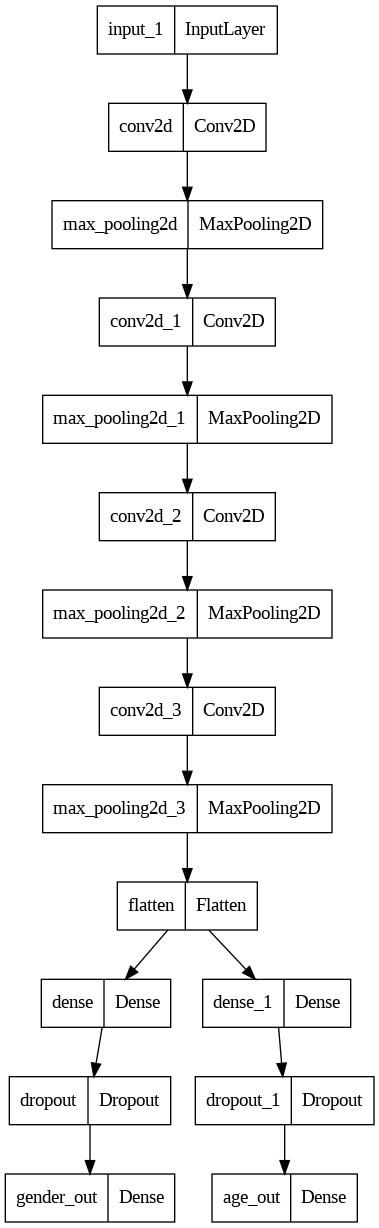

In [18]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [19]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
593/593 [==============================] - 729s 1s/step - loss: 15.1131 - gender_out_loss: 0.6404 - age_out_loss: 14.4727 - gender_out_accuracy: 0.6114 - age_out_accuracy: 0.0000e+00 - val_loss: 16.0420 - val_gender_out_loss: 0.6418 - val_age_out_loss: 15.4002 - val_gender_out_accuracy: 0.6585 - val_age_out_accuracy: 0.2367
Epoch 2/10
593/593 [==============================] - 721s 1s/step - loss: 11.4459 - gender_out_loss: 0.4800 - age_out_loss: 10.9659 - gender_out_accuracy: 0.7817 - age_out_accuracy: 0.0000e+00 - val_loss: 10.3475 - val_gender_out_loss: 0.5715 - val_age_out_loss: 9.7761 - val_gender_out_accuracy: 0.6899 - val_age_out_accuracy: 0.1442
Epoch 3/10
593/593 [==============================] - 721s 1s/step - loss: 10.0806 - gender_out_loss: 0.4199 - age_out_loss: 9.6607 - gender_out_accuracy: 0.8095 - age_out_accuracy: 0.0000e+00 - val_loss: 7.0789 - val_gender_out_loss: 0.5493 - val_age_out_loss: 6.5296 - val_gender_out_accuracy: 0.7357 - val_age_out_accuracy: 

# Ploting The Results

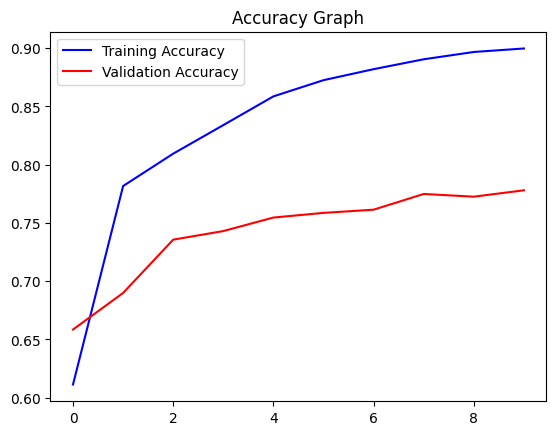

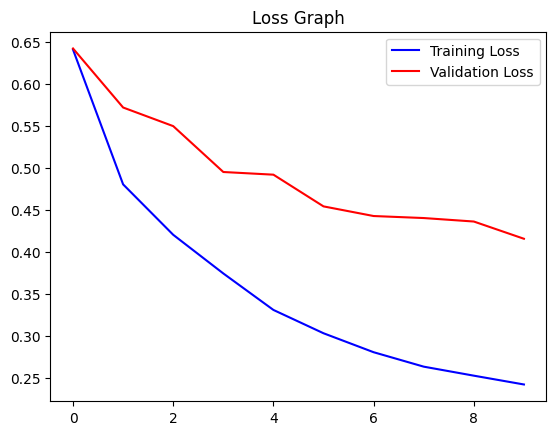

In [20]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

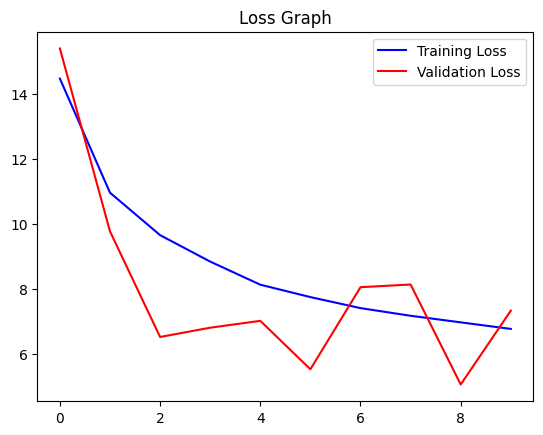

In [21]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

# Testing Our Model

Original Gender: Male Original Age: 75
1/1 [==============================] - 0s 82ms/step
Predicted Gender: Male Predicted Age: 74


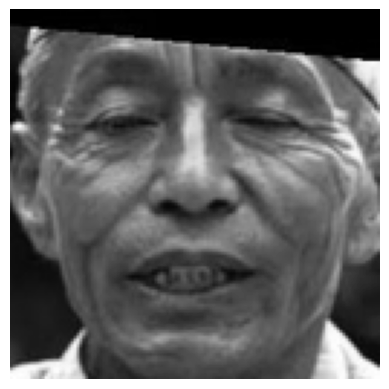

In [29]:
image_index = 501
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 57
1/1 [==============================] - 0s 206ms/step
Predicted Gender: Female Predicted Age: 54


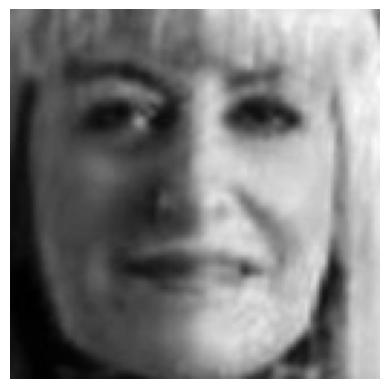

In [30]:
image_index = 3100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');


Original Gender: Female Original Age: 59
1/1 [==============================] - 0s 31ms/step
Predicted Gender: Female Predicted Age: 62


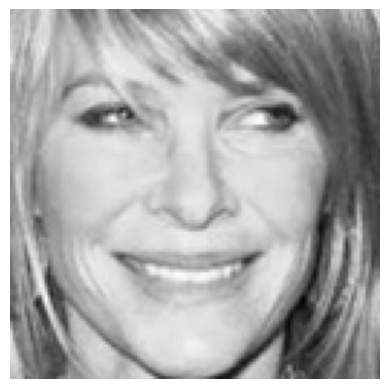

In [33]:
image_index = 3400
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');